# Cantera Example: Heating values
## Poder calorífico de la mezcla ($90\%C_{12}H_{26}+10\%H_2$)
La combustión completa de la mezcla sigue la siguiente reacción:
<br>
$(0.9C_{12}H_{26}+0.1H_2)+a(O_2+3.76N_2)\rightarrow bCO_2+cH_2O+dN_2$

$C: 0.9(12)=b$

$H: 0.9(26)+0.1(2)=c(2)$

$O: a(2)=b(2)+c$

$N: a(3.76)(2)=d(2)$

Luego de iterar, se obtiene que:
<br>
$a=16.7 \quad b= 10.8 \quad c=11.8 \quad d=62.79$

$(0.9C_{12}H_{26}+0.1H_2)+16.7(O_2+3.76N_2)\rightarrow 10.8CO_2+11.8H_2O+62.79N_2$

We compute the lower heating value (LHV) as the difference in enthalpy (per kg *mixture*) between reactants and products at constant temperature and pressure, divided by the mass fraction of fuel in the reactants

In [1]:

import cantera as ct
gas = ct.Solution('nDodecane_Reitz.cti', 'nDodecane_IG')


# Primero se establece el estado de la mezcla
gas.TPX = 298.15, 101325, "C12H26:0.9, H2:0.1, O2:16.7, N2:62.79"
h1_mass = gas.enthalpy_mass

Y_C12H26 = gas['C12H26'].Y[0] # returns an array, of which we only want the first element
Y_H2 = gas['H2'].Y[0]
Y_fuel = Y_C12H26 + Y_H2

# Se establece el estado de los productos sin cambiar P y T
gas.TPX = None, None, 'CO2:10.8, H2O:11.8, N2:62.79' 
h2_mass = gas.enthalpy_mass

#Cálculo del LHV molar
LHV_m = -(h2_mass-h1_mass)/Y_fuel/1e6 #Cálculo del poder calorífico inferior másico
M = (0.9)*170 + (0.1)*2 #cálculo del peso molecular de la mezcla
LHV = LHV_m*M #Cálculo del poder calorífico inferior molar
v_st = 23.7 #Volúmen estándar
LHV_v = LHV/v_st

print('LHV_m = {:.3f} MJ/kg'.format(LHV_m))
print('LHV = {:.3f} MJ/kmol'.format(LHV))
print('LHV_v = {:.3f} MJ/m3'.format(LHV_v))

#Para hallar el poder calorífico superior
water = ct.Water()
# Se establece el estado líquido del agua con calidad = 0
water.TX = 298, 0
h_liquid = water.h
# Se establece el estado gaseoso del agua con calidad = 1
water.TX = 298, 1
h_gas = water.h

# Cálculo del poder calorífico superior
Y_H2O = gas['H2O'].Y[0]
HHV_m = -(h2_mass-h1_mass + (h_liquid-h_gas) * Y_H2O)/Y_fuel/1e6
HHV = HHV_m*M
HHV_v = HHV/v_st
print('HHV_m = {:.3f} MJ/kg'.format(HHV_m))
print('HHV = {:.3f} MJ/kmol'.format(HHV))
print('HHV_v = {:.3f} MJ/m3'.format(HHV_v))

LHV_m = 44.569 MJ/kg
LHV = 6827.962 MJ/kmol
LHV_v = 288.100 MJ/m3
HHV_m = 47.952 MJ/kg
HHV = 7346.189 MJ/kmol
HHV_v = 309.966 MJ/m3


## Cálculo de la fracción másica y fracción elemental en masa

Para calcular la fracción elemental en masa de cada uno de los elementos presentes en la mezcla de combustibles, se utilizó la función de Cantera ".elemental_mass_fraction['especie']".
<br>
Para calcular la fracción másica de cada uno de los combustibles en la mezcla, se utilizó la función de Cantera "gas['especie'].Y[0]".

In [2]:
gas1 = ct.Solution('nDodecane_Reitz.cti', 'nDodecane_IG')
gas1.TPX = 298.15, 101325, "C12H26:0.9, H2:0.1"
H = gas1.elemental_mass_fraction('H')
C = gas1.elemental_mass_fraction('C')
Y_C12H26 = gas1['C12H26'].Y[0]
Y_H2 = gas1['H2'].Y[0]
print(f"La fracción elemental en masa del H es: {H:.3f}")
print(f"La fracción elemental en masa del C es: {C:.3f}")
print(f"La fracción másica del diesel es: {Y_C12H26:.3f}")
print(f"La fracción másica del hidrógeno es: {Y_H2:.3f}")

La fracción elemental en masa del H es: 0.155
La fracción elemental en masa del C es: 0.845
La fracción másica del diesel es: 0.999
La fracción másica del hidrógeno es: 0.001


## Cálculo de la masa estequimétrica de aire

$m_{fuel} = n_{C_{12}H{26}} M_{C_{12}H{26}}+n_{H_2} M_{H_2}$

$m_{air} = n_{air}M_{air}$

$m_{air-stoich} = \frac{m_{air}}{m_{fuel}}$


In [3]:
m_fuel = 0.9*170 + 0.1*2
m_aire = 16.7*(4.76)*29
m_st_aire = m_aire/m_fuel

print(f"La masa estequimétrica de combustible es: {m_st_aire:.3f} kg_air/kg_fuel")

La masa estequimétrica de combustible es: 15.047 kg_air/kg_fuel


## Masa y volúmen de humos húmedos 
$m_{f-hum-total} = n_{CO_2} M_{CO_2} + n_{H_2O} M_{H_2O} + n_{N_2} M_{N_2}$

$m_{f-hum} = \frac{m_{f-hum-total}}{m_{fuel}}$

$m_{f-hum} = 15.96 \frac{kg_{f-hum}}{kg_{fuel}}$

$V_{f-hum} = 85.39 \frac{m^3_{f-hum}}{m^3_{fuel}}$


In [4]:
m_f_hum = 10.8*44 + 11.8*18 + 62.79*28
mf_hum = m_f_hum/m_fuel
vf_hum = 10.8 + 11.8 + 62.79
print(f"La masa de humos húmedos es: {mf_hum:.2f} kg_hum/kg_fuel")
print(f"El volúmen de humos húmedos es: {vf_hum:.2f} m3_hum/m3_fuel")

La masa de humos húmedos es: 15.96 kg_hum/kg_fuel
El volúmen de humos húmedos es: 85.39 m3_hum/m3_fuel


## Masa y volúmen de humos secos

$m_{f-sec-total} = n_{CO_2} M_{CO_2} + n_{N_2} M_{N_2}$

$m_{f-sec} = \frac{m_{f-sec-total}}{m_{fuel}}$

$m_{f-sec} = 14.58 \frac{kg_{f-sec}}{kg_{fuel}}$

$V_{f-sec} = 73.59 \frac{m^3_{f-sec}}{m^3_{fuel}}$

In [5]:
m_f_sec = 10.8*44 + 62.79*28
mf_sec = m_f_sec/m_fuel
vf_sec = 10.8 + 62.79

print(f"La masa de humos secos es: {mf_sec:.2f} kg_hum/kg_fuel")
print(f"El volúmen de humos secos es: {vf_sec:.2f} m3_hum/m3_fuel")

La masa de humos secos es: 14.58 kg_hum/kg_fuel
El volúmen de humos secos es: 73.59 m3_hum/m3_fuel


## Porcentaje máximo de CO2
Para hallar el porcentaje máximo de $CO_2$ en los productos de combustión:

$\%max-CO_2 = \frac{n_{CO_2}}{n_{CO_2} + n_{N_2}}100\%$

$\%max-CO_2 = 14.68 \%$

In [6]:
porcentaje_CO2 = 10.8/(10.8 + 62.79)*100

print(f"El porcentaje máximo de CO2 es: {porcentaje_CO2:.2f} %")

El porcentaje máximo de CO2 es: 14.68 %


## Intervalo de inflamabilidad

Los límites de inflamabilidad se calculan siguiendo la relación de volúmen de gas combustible y volúmen de mezcla combustible-aire. Para los componentes de la mezcla indicada se tienen los siguientes límites de inflamabilidad:

$LI=\frac{V_{fuel}}{V_{fuel}+V_{air}}100\%$

$LII_{C_{12}H{26}} = 0.7\%\quad LII_{H_2} = 4\%$

$LSI_{C_{12}H{26}} = 5\%\quad LSI_{H_2} = 75\%$

Luego, los límites de inflamabilidad de la mezcla: 

$\frac{1}{LII_{mixture}} = \frac{x_{C_{12}H{26}}}{LII_{C_{12}H{26}}} + \frac{x_{H_2}}{LII_{H_2}}$

$\frac{1}{LSI_{mixture}} = \frac{x_{C_{12}H{26}}}{LSI_{C_{12}H{26}}} + \frac{x_{H_2}}{LSI_{H_2}}$

$LII_{mixture} = 0.76\% \quad LSI_{mixture} = 5.51\% \quad LI_{estequiométrico} = 1.24\%$

Como puede observarse, la relación estequiométrica se encuentra dentro del intervalo de inflamabilidad.
<br>
Por otro lado, el dosado relativo en el LII y LSI de la mezcla es $\phi_{LII}=0.61$ y $\phi_{LSI}=4.38$ respectivamente. Del mismo modo, el factor de aireación en el LII y LSI es $\lambda_{LII}=1.65$ y $\lambda_{LSI}=0.23$ respectivamente.

In [7]:
LLI_C12H26 = 0.7
LSI_C12H26 = 5
LLI_H2 = 4
LSI_H2 = 75
LLI_mix = 1/(0.9/LLI_C12H26 + 0.1/LLI_H2)
LSI_mix = 1/(0.9/LSI_C12H26 + 0.1/LSI_H2)
LI_stoich = 1/(1+16.7*4.76)*100
fuel_air_stoich = 1/(16.7*4.76)
fuel_air_LLI = 1/(1/(LLI_mix/100)-1)
fuel_air_LSI = 1/(1/(LSI_mix/100)-1)
phi_LII = fuel_air_LLI/fuel_air_stoich
phi_LSI = fuel_air_LSI/fuel_air_stoich
f_air_LII = 1/phi_LII
f_air_LSI = 1/phi_LSI
print(f"El intervalo de inflamabilidad de la mezcla en % es: [{LLI_mix:.2f};{LSI_mix:.2f}]")
print(f"La relación estequiométrica combustible/aire toma un valor de {LI_stoich:.2f}%.")
print(f"El dosado relativo en el LII y LSI es {phi_LII:.2f} y {phi_LSI:.2f} respectivamente.")
print(f"El factor de aireación en el LII y LSI es {f_air_LII:.2f} y {f_air_LSI:.2f} respectivamente.")

El intervalo de inflamabilidad de la mezcla en % es: [0.76;5.51]
La relación estequiométrica combustible/aire toma un valor de 1.24%.
El dosado relativo en el LII y LSI es 0.61 y 4.64 respectivamente.
El factor de aireación en el LII y LSI es 1.64 y 0.22 respectivamente.


## Gravedad específica

Para hallar la gravedad específica de la mezcla, primero hallamos la gravedad específica de cada uno de los componentes. Por el lado del dodecano, se asume que está en fase vapor y que tiene comportamiento de gas ideal.
<br>
Dadas las anteriores simplificaciones, se tiene que:

$d=\frac{M_{fuel}}{M_{air}}$

$d_{mix}=\sum x_id_i$

$d_{mix}=5.28$

In [8]:
M_C12H26 = 170 #kg/kmol
M_H2 = 2 #kg/kmol
M_air = 29 #kg/kmol
d_C12H26 = M_C12H26/M_air
d_H2 = M_H2/M_air
d_mix = 0.9*d_C12H26 + 0.1*d_H2
print(f"La gravedad específica de la mezcla es: {d_mix:.2f}")
print(f"La gravedad específica del H2: {d_H2:.2f}")
print(f"La gravedad específica del C12H26: {d_C12H26:.2f}")

La gravedad específica de la mezcla es: 5.28
La gravedad específica del H2: 0.07
La gravedad específica del C12H26: 5.86


## Temperatura de llama adiabática

Para hallar la temperatura de llama adiabática se asume combustión completa. Esta temperatura, se alcanza cuando el dosado relativo o el factos de aireación es estequiométrico.

In [9]:

phi = 1 #en la relación estequimétrica se alcanza la temperatura de llama adiabática
gas.set_equivalence_ratio(phi,'C12H26:0.9, H2:0.1', 'O2:16.7, N2:62.79')
gas.TP = 298, ct.one_atm
gas.equilibrate('HP')
gas.T
print(f"La temperatura de llama adiabática para la mezcla es de {gas.T:.2f} K.")

La temperatura de llama adiabática para la mezcla es de 2285.73 K.


## Índice de Wobbe

$W = HHV /\sqrt{d}$

$W_{mix} = \frac{\sum x_iHHV_{v,i}}{\sqrt{\sum x_id_i}}$

In [10]:
import math

HHV_v_H2 = 11.966
HHV_v_C12H26 = 343.072
W_mix = (0.9*HHV_v_C12H26+0.1*HHV_v_H2)/(math.sqrt(0.9*d_C12H26+0.1*d_H2))
print(f"El índice de Wobbe de la mezcla es: {W_mix:.2f} MJ/m3")

El índice de Wobbe de la mezcla es: 134.86 MJ/m3


## Temperatura de rocío

Para hallar la temperatura de rocío debemos hallar en un principio la presión parcial del $H_2O$ en los productos. Posteriormente buscamos la temperatura de inicio de la condensación para dicha presión.

In [16]:
p_productos = 101325 #Pa, pues se asume que los productos salen a condiciones estándar 
n_productos = 85.39
n_H2O = 11.8
P_parcial_H2O = (n_H2O/n_productos)*p_productos
w = ct.Water()
w.PX = P_parcial_H2O, 1
T_rocio = w.T
print(f"La temperatura de rocío es: {T_rocio:.2f} K")

La temperatura de rocío es: 325.75 K


## Factor de emisión de CO2

Para hallar el factor de emisión, debemos hallar la masa de CO2 producida en la reacción y posteriormente dividirla por el poder calorífico inferior másico.

$m_{CO_2}=\frac{M_{CO_2}n_{CO_2}}{n_{C_{12}H{26}}M_{C_{12}H{26}}+n_{H_2}M_{H_2}}$

$Fe=\frac{m_{CO_2}}{LHV_m}$

In [12]:
m_CO2 = (44*10.8)/(170*0.9+2*0.1)
Fe = m_CO2/(LHV_m*1e-6)
print(f"El factor de emisión de CO2 es de {Fe:.2f} kg_CO2/TJ_LHV")

El factor de emisión de CO2 es de 69596.17 kg_CO2/TJ_LHV


## Reducción de aire respecto a diesel puro

Para hallar el porcentaje de reducción de aire respecto a la condición de diésel puro, se toman los valores de las moles de aire para la dos condiciones, diésel puro y la mezcla diésel-Hidrógeno.

$C_{12}H_{26}+18.5(O_2+3.76N_2)\rightarrow 12CO_2+13H_2O+69.56N_2$

$(0.9C_{12}H_{26}+0.1H_2)+16.7(O_2+3.76N_2)\rightarrow 10.8CO_2+11.8H_2O+62.79N_2$

Posteriormente, se restan las dos cantidades y se divide el resultado por las moles de aire en el caso del diésel puro.

$\%reduccion-aire = \frac{18.5-16.7}{18.5}100\%$


In [13]:
red_air = (18.5-16.70)/18.5*100
print(f"El porcentaje de reducción de aire respecto al caso de diésel puro es: {red_air:.2f}%")

El porcentaje de reducción de aire respecto al caso de diésel puro es: 9.73%


## Botellas de agua que se pueden llenar quemando 1000 kg de combustible

En primer lugar, debemos calcular el número de moles a los que corresponden 1000 kg de combustible, para esto utilizamos la ecuación $m=n*M$.

$n:$ Es el número de moles [kmol]

$m:$ Es la masa [kg]

$M:$ Es el peso molecular [kg/kmol]

El número de moles que nos arroje el cálculo, multiplicará las moles de combustible:

$6.53(0.9C_{12}H_{26}+0.1H_2)+a(O_2+3.76N_2)\rightarrow bCO_2+cH_2O+dN_2$

$C: 6.53(0.9)(12)=b$

$H: 6.53(0.9(26)+0.1(2))=c(2)$

$O: a(2)=b(2)+c$

$N: a(3.76)(2)=d(2)$

$6.53(0.9C_{12}H_{26}+0.1H_2)+109.1(O_2+3.76N_2)\rightarrow 70.52CO_2+77.05H_2O+410N_2$

Nuevamente se balancea la ecuación y se calcula la masa de agua que se obtiene de realizar la combustión. Finalmente se tiene que quemando 1000 kg de combustible, se obtienen 1386 botellas de agua.

In [14]:
n_fuel = 1000/(170*0.9+2*0.1)

n_H2O = 77.05 #kmol
M_H2O = 18 #kg/kmol
m_H2O = n_H2O*M_H2O
rho_H2O = 1 #kg/lt 
v_H2O = m_H2O/rho_H2O
print("El número de botellas que se pueden llenar quemando 1000 kg de combustible es: {}" .format(v_H2O//1))


El número de botellas que se pueden llenar quemando 1000 kg de combustible es: 1386.0


## Setup para un quemador de coflujo (llama no-premezclada)

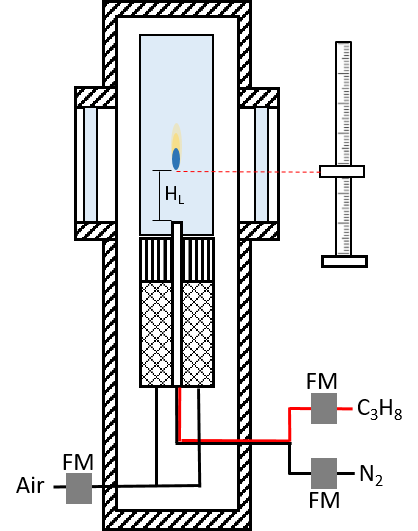